#EMアルゴリズムを用いた混合モデル

##データの生成

In [0]:
import numpy as np 
import math
import matplotlib.pyplot as plt

np.random.seed(0)

def data_generate(n):
  return (np.random.randn(n)
  + np.where(np.random.rand(n) > 0.3, 2., -2.))

<BarContainer object of 50 artists>

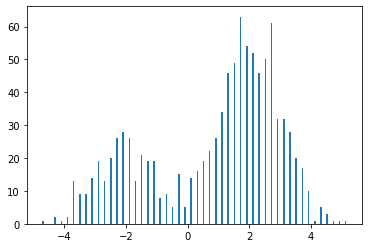

In [81]:
aa = np.histogram(data_generate(1000), bins =50)
a_bins = aa[1]
a_hist = aa[0]
X1 = []
for i in range(1, len(a_bins)):
    X1.append((a_bins[i-1]+a_bins[i])/2)
plt.bar(X1,a_hist, width=0.05)

##標準偏差の定義

In [0]:
def nomal_distribution(x , mu, dev):
    c = (2 * math.pi * math.pow(dev, 2)) ** (-1/2)
    a = (-(x-mu)**2)/(2 * (dev**2) )
    return c * math.exp(a)

##EM Algorithm

In [0]:
def ita(xi, mu, dev, m = m):
    s = 0
    for i in range(m):
        s += w[i] * nomal_distribution(xi, mu[i], dev[i])
    n = []
    for l in range(m):
        n.append(w[l] * nomal_distribution(xi, mu[l], dev[l])/s)
    return n #m行列

def E (x, mu, dev, m = m, data_size = data_size):
    Q = 0
    for i in range(data_size):
        for j in m:
            Q += ita(x[i], mu, dev)[j] * ( math.ln(w[j]) + math.ln(nomal_distribution(xi, mu[j], dev[j])) )
    
    return Q

def M(x, mu, dev, d,  m = m, data_size = data_size):
    n = 0
    a = 0
    aa = 0
    for i in range(data_size):
        n += np.array(ita(x[i], mu, dev))
        a += (np.array(ita(x[i], mu, dev)) * x[i])
        aa += np.array(ita(x[i], mu, dev)) * (( x[i] - mu) ** 2) 

    w1 = (1/data_size)*n
    mu1 = [ a[j]/n[j] for j in range(m) ] 
    dev1 = [math.sqrt( aa[j]/(d*n[j]) ) for j in range(m)]  

    return w1, mu1, dev1

確率密度

In [0]:
def probability_distribution(xi, w1, mu1, dev1):
    p = 0
    pro = []
    for j in range(m):
        p +=  w1[j] * nomal_distribution(xi, mu1[j], dev1[j])
    return p

実行

[0.19638427 0.20408856 0.59952717] [-0.20864659916110848, -2.273885274109241, 2.1556615225891553] [1.8621123067402683, 0.8603727052718289, 0.9780950980457128]
[0.2, 0.2, 0.6] [-0.91476732 -0.22999418  0.79209372] [-0.19445269 -0.09442887 -0.03852254]


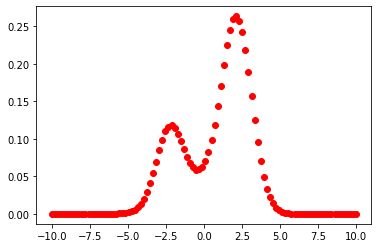

In [149]:
epoc = 30
m = 3
data_size = 1000
mu = np.random.uniform(-1, 1, m)
w = [0.2,0.2,0.6]
dev = np.random.uniform(-0.2, 0.2, m)
x = data_generate(data_size)
w1, mu1, dev1 =  M(x, mu, dev, 1)
for num in range(epoc):
    w1, mu1, dev1 = M(x, mu1, dev1, 1)

xx = np.linspace(-10, 10, 100)
pp0 = [probability_distribution(xx[i] ,w, mu, dev) for i in range(len(xx))]   
pp = [probability_distribution(xx[i] ,w1, mu1, dev1) for i in range(len(xx))]   
plt.scatter(xx,pp, c='red')
#plt.scatter(xx,pp0, c = 'blue')